In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Подготовка датасетов (отсеивание остатков)

In [30]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_NEMO_SPITZ_GRID(20x4).csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%Y-%m-%d')

for column in list(df_nemo.columns.values):
    if column!='dates':
        df_nemo[column]=df_nemo[column]-np.mean(df_nemo[column])
        stl = STL(df_nemo[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            #print(ks)
            df_nemo[column]=df_nemo[column]-res.resid
        else:
            print(column)
            
df_nemo=df_nemo[:-1]
df_nemo

,76.04_8.72,76.84_10.72,76.04_10.72,75.24_10.72,76.84_12.72,76.04_12.72,75.24_12.72,76.04_14.72,75.24_14.72,76.04_16.72,...,77.64_26.72,76.84_26.72,76.04_26.72,75.24_26.72,77.64_28.72,76.84_28.72,76.04_28.72,76.84_30.72,76.84_32.72,dates
0,0.043625,0.020422,0.047565,0.029404,0.003458,0.092560,0.052151,-0.004117,0.022382,0.007686,...,0.018083,0.019788,-0.003431,-0.009815,0.009724,-0.009160,-0.012395,-0.006996,0.008986,2002-01-01
1,0.047393,0.023746,0.049272,0.033769,0.005018,0.096356,0.053323,-0.000530,0.021276,0.010792,...,0.022632,0.023539,0.003075,-0.000194,0.013870,-0.001995,-0.005301,0.000388,0.014536,2002-01-02
2,0.044247,0.011521,0.049129,0.022814,0.010857,0.097271,0.033787,-0.018142,0.011630,-0.005681,...,0.010347,0.001088,-0.008400,-0.006613,0.006939,-0.011129,-0.017642,-0.004274,0.003871,2002-01-03
3,0.062146,0.038022,0.068821,0.034043,0.027169,0.103096,0.047187,0.006027,0.031988,0.012539,...,0.015262,0.013042,-0.008172,-0.010695,0.013597,-0.006079,-0.014887,-0.010944,0.001652,2002-01-04
4,0.072028,0.049916,0.083135,0.042977,0.030714,0.109638,0.064967,0.019700,0.040898,0.016081,...,0.025431,0.025839,0.016494,0.008002,0.026036,0.007895,0.007914,-0.000113,0.019461,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.044721,0.051926,0.039476,0.075864,0.030185,0.055426,0.051209,0.053924,0.050962,0.078193,...,0.086819,0.097986,0.096293,0.080727,0.085268,0.100801,0.104121,0.111279,0.101193,2002-12-27
361,0.039327,0.045528,0.036132,0.070488,0.029018,0.065432,0.047599,0.055863,0.031723,0.076760,...,0.081824,0.095218,0.085243,0.075528,0.078301,0.094870,0.091462,0.102804,0.094042,2002-12-28
362,0.035425,0.040966,0.037730,0.064962,0.035383,0.071961,0.042368,0.054212,0.022649,0.071978,...,0.080725,0.095761,0.085406,0.073137,0.077812,0.095748,0.088964,0.098624,0.090550,2002-12-29
363,0.032043,0.035365,0.040945,0.060793,0.037407,0.064254,0.039702,0.052766,0.019930,0.062515,...,0.087484,0.102800,0.089072,0.073757,0.083672,0.101643,0.095456,0.097769,0.092106,2002-12-30


In [4]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis_GRID(20x4).csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')

for column in list(df_rean.columns.values):
    if column!='dates':
        df_rean[column]=df_rean[column]-np.mean(df_rean[column])
        stl = STL(df_rean[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)        
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            df_rean[column]=df_rean[column]-res.resid
        else:
            print(column)
df_rean

,76.04_8.72,76.84_10.72,76.04_10.72,75.24_10.72,76.84_12.72,76.04_12.72,75.24_12.72,76.04_14.72,75.24_14.72,76.04_16.72,...,77.64_26.72,76.84_26.72,76.04_26.72,75.24_26.72,77.64_28.72,76.84_28.72,76.04_28.72,76.84_30.72,76.84_32.72,dates
0,0.034992,0.016958,0.009720,-0.001750,0.009038,0.007889,-0.007242,-0.007944,-0.005034,-0.014921,...,0.023100,-0.000872,-0.008191,-0.019869,0.018493,-0.001989,-0.005848,-0.020535,0.001356,2002-01-01
1,0.058270,0.042173,0.036702,0.023623,0.035705,0.037181,0.020777,0.023757,0.025204,0.013618,...,0.048055,0.025248,0.019895,0.010983,0.048041,0.030079,0.030749,0.022316,0.049706,2002-01-02
2,0.062436,0.047277,0.043468,0.029177,0.040548,0.043036,0.026623,0.027308,0.028141,0.013978,...,0.060137,0.032853,0.012576,-0.023928,0.052728,0.031040,0.010645,0.012881,0.025435,2002-01-03
3,0.063424,0.048284,0.045603,0.029661,0.039782,0.044165,0.026890,0.026219,0.027957,0.012561,...,0.047818,0.027391,0.009091,0.001987,0.043810,0.018982,0.013497,-0.017130,0.004181,2002-01-04
4,0.056305,0.040442,0.035530,0.017736,0.028750,0.030878,0.013529,0.014120,0.014998,0.013821,...,0.051683,0.036860,0.026029,0.007951,0.052446,0.033440,0.029918,0.012275,0.045194,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.053847,0.041909,0.065143,0.049430,0.039997,0.040875,0.031277,0.053938,0.033211,0.078989,...,0.081267,0.088385,0.077588,0.070094,0.075973,0.086300,0.076895,0.080870,0.071904,2002-12-27
361,0.056429,0.039691,0.064340,0.051770,0.039537,0.039851,0.029469,0.052409,0.033064,0.075239,...,0.081302,0.092529,0.070229,0.067410,0.076235,0.081319,0.073393,0.059155,0.060337,2002-12-28
362,0.059627,0.040791,0.067532,0.056638,0.041125,0.042178,0.033426,0.053238,0.038548,0.068613,...,0.079316,0.089068,0.070665,0.070123,0.075711,0.080080,0.076564,0.059734,0.070495,2002-12-29
363,0.066121,0.051264,0.076209,0.064521,0.052194,0.051025,0.043247,0.063791,0.048730,0.076269,...,0.085897,0.098204,0.076889,0.077480,0.080958,0.086340,0.082537,0.067323,0.074877,2002-12-30


## Функция для получения коэффициентов для взвешенного ансамбля

In [48]:
# a*nemo+b*arima=real - multiple linear regression (https://datatofish.com/multiple-linear-regression-python/)

def get_hybrid_coeffs(nemo_tr, arima_tr, real_tr):
    df=pd.DataFrame()
    df['x1']=nemo_tr
    df['x2']=arima_tr
    df['y']=real_tr
    X = df[['x1', 'x2']]
    Y = df['y']
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    return (regr.intercept_, regr.coef_)

## Взвешенная гибридная модель (NEMO+ARIMA)

In [36]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import linear_model

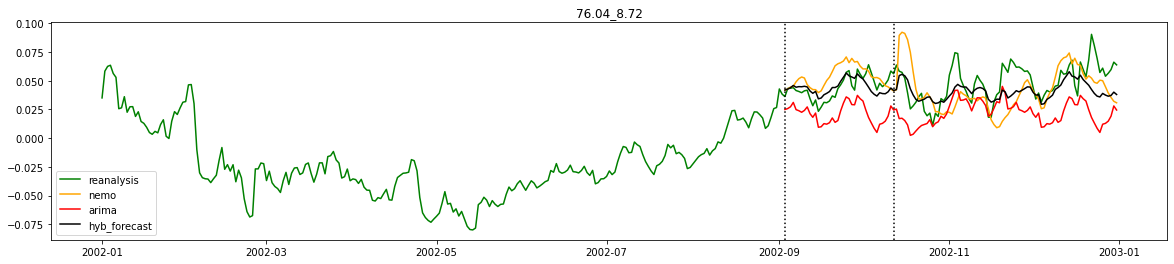

Nemo coeff: 0.33825235186887564
Arima coeff: 0.45201229893700323

Hybrid model:
MSE =  0.00026115499487155465
MAE =  0.012655738109344079
MAPE =  28.063
R^2 =  0.017952298146487022

ARIMA:
MSE =  0.0008982730785066495
MAE =  0.02607947851033703
MAPE =  51.132
R^2 =  -2.3778676636769167


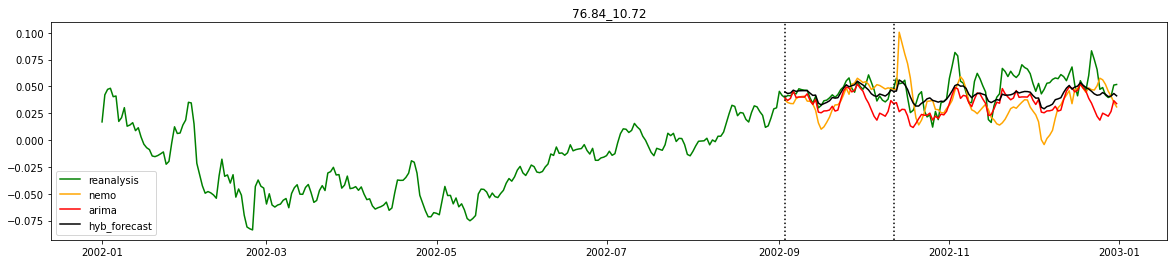

Nemo coeff: 0.25310523181254224
Arima coeff: 0.3771729136870722

Hybrid model:
MSE =  0.00023317569635735664
MAE =  0.012545940728191329
MAPE =  28.092
R^2 =  -0.018065623339669434

ARIMA:
MSE =  0.00040777868704023923
MAE =  0.0172318111018459
MAPE =  33.206
R^2 =  -0.7803976558947046


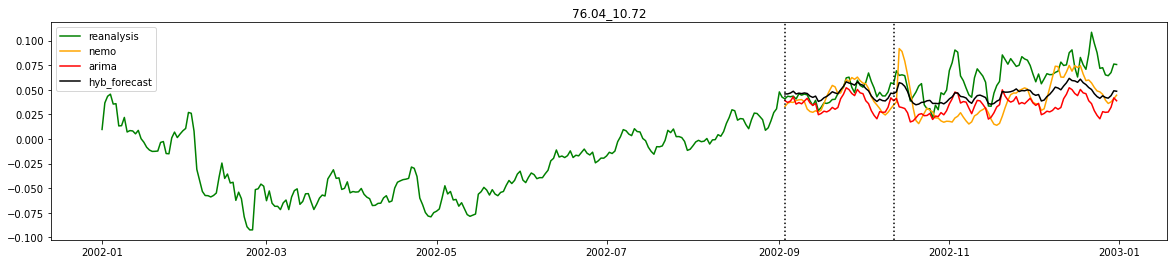

Nemo coeff: 0.24148688364693882
Arima coeff: 0.4370603133966579

Hybrid model:
MSE =  0.0005537772580560584
MAE =  0.02049860562170545
MAPE =  29.879
R^2 =  -0.8382451908881234

ARIMA:
MSE =  0.0011293260936423668
MAE =  0.031034671794635604
MAPE =  46.234
R^2 =  -2.7487604093203872


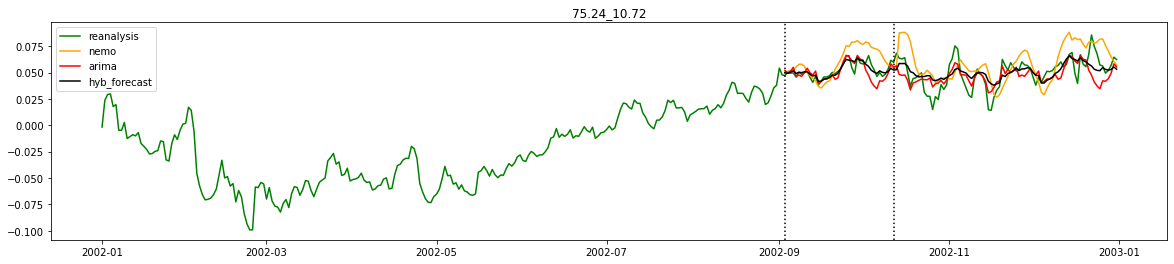

Nemo coeff: 0.2724848298262395
Arima coeff: 0.3888735543513931

Hybrid model:
MSE =  0.00013024645460391326
MAE =  0.008886766627649752
MAPE =  24.652
R^2 =  0.3883345119538486

ARIMA:
MSE =  0.00013990082097474423
MAE =  0.00932387482853666
MAPE =  22.691
R^2 =  0.34299552183738935


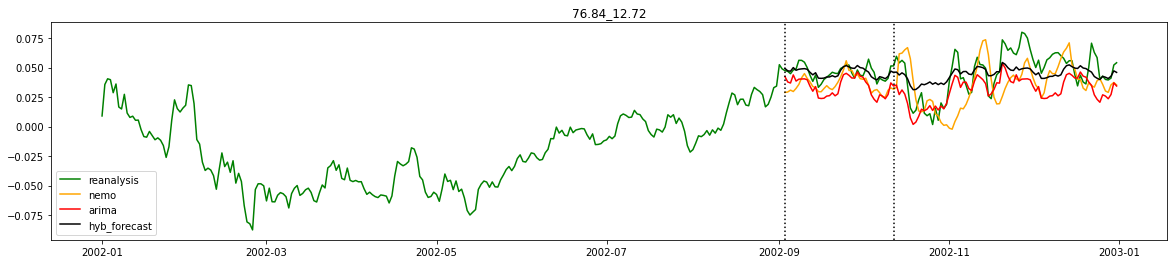

Nemo coeff: 0.041122397309581254
Arima coeff: 0.45640836639178767

Hybrid model:
MSE =  0.0002316686471838806
MAE =  0.01273825605489573
MAPE =  70.047
R^2 =  0.3395545511037813

ARIMA:
MSE =  0.00038869276566504677
MAE =  0.016449912839707655
MAPE =  43.9
R^2 =  -0.10809283527523594


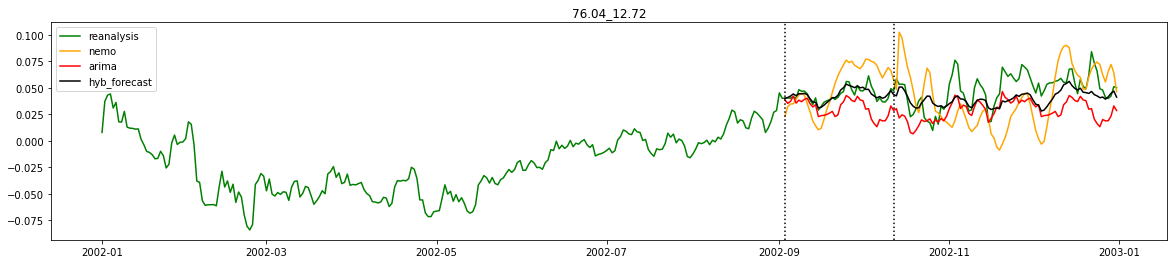

Nemo coeff: 0.2194202094305611
Arima coeff: 0.4045943958710892

Hybrid model:
MSE =  0.0002550652078002097
MAE =  0.013035866126759155
MAPE =  31.56
R^2 =  -0.008776458836560641

ARIMA:
MSE =  0.0005308356797474063
MAE =  0.020157434384420206
MAPE =  39.932
R^2 =  -1.0994417147599962


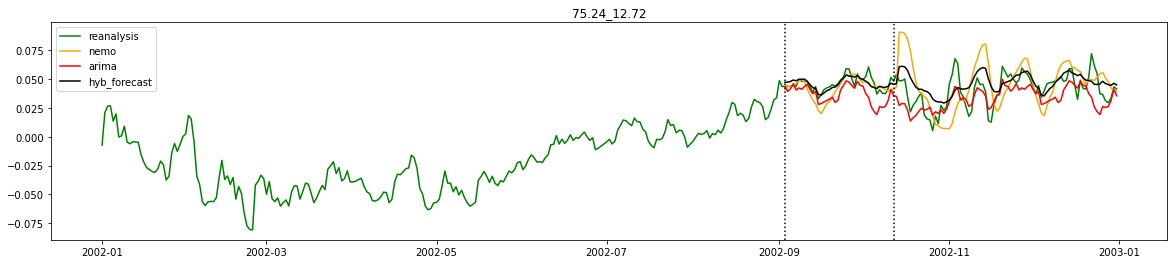

Nemo coeff: 0.3548440114655742
Arima coeff: 0.26867706125562335

Hybrid model:
MSE =  0.00019018814771129756
MAE =  0.010892113809176974
MAPE =  43.925
R^2 =  0.0639323684168045

ARIMA:
MSE =  0.00016866294432395056
MAE =  0.010375143352587945
MAPE =  29.298
R^2 =  0.16987506987644763


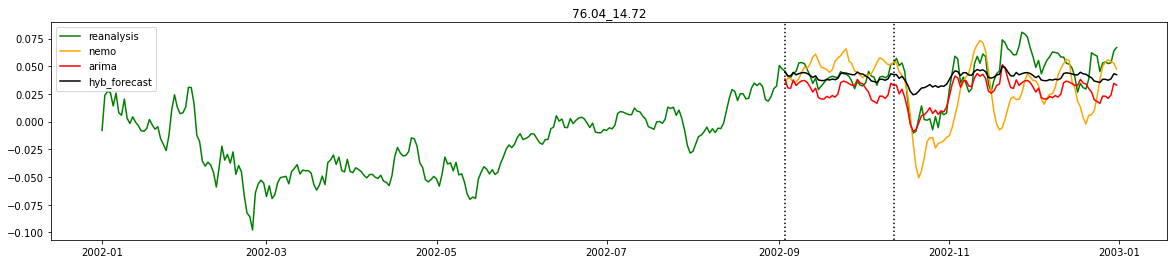

Nemo coeff: 0.003720419193066925
Arima coeff: 0.4286329589844669

Hybrid model:
MSE =  0.00038354641321611304
MAE =  0.017178301746113612
MAPE =  79.277
R^2 =  0.2827074947082998

ARIMA:
MSE =  0.0005228174683169033
MAE =  0.018870963202842626
MAPE =  47.211
R^2 =  0.02224857608565134


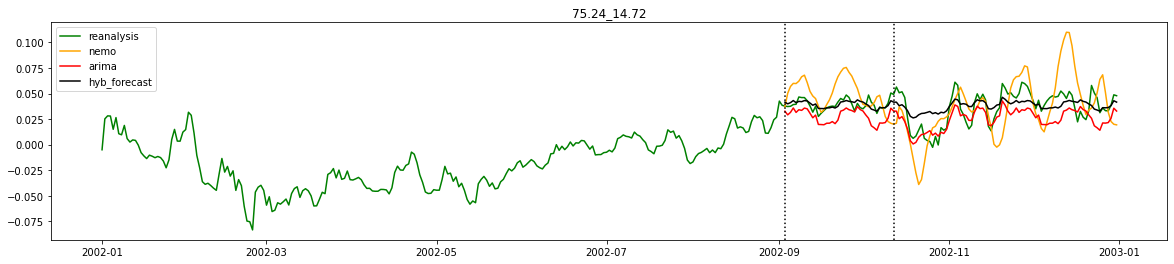

Nemo coeff: 0.002391844777769367
Arima coeff: 0.47744187353950374

Hybrid model:
MSE =  0.00018686536445202832
MAE =  0.011388073432121134
MAPE =  -54.175
R^2 =  0.3356057295632723

ARIMA:
MSE =  0.0002495554846499326
MAE =  0.013604543059072627
MAPE =  5.853
R^2 =  0.11271286338330166


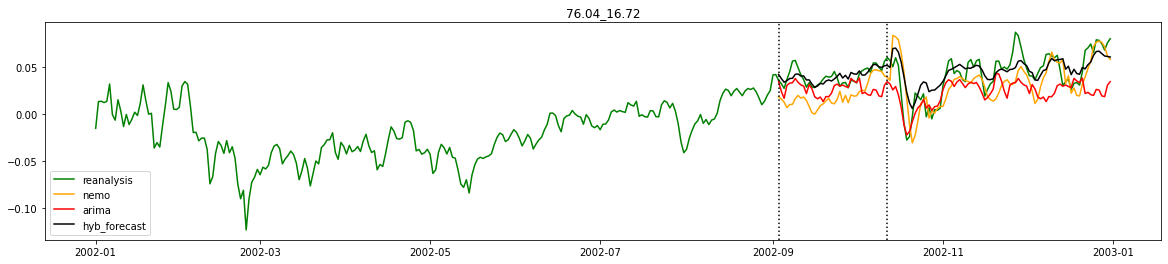

Nemo coeff: 0.46469419678739105
Arima coeff: 0.31819940692433013

Hybrid model:
MSE =  0.0002801738343298692
MAE =  0.012969598223097126
MAPE =  1.437
R^2 =  0.5405747721326217

ARIMA:
MSE =  0.0007241847657041957
MAE =  0.021343294719397617
MAPE =  31.235
R^2 =  -0.18750829033524807


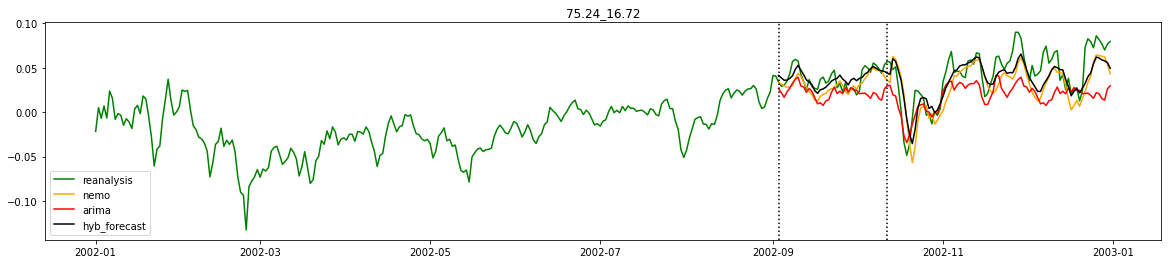

Nemo coeff: 0.7100175004981837
Arima coeff: 0.31667227537734755

Hybrid model:
MSE =  0.00039656254656671077
MAE =  0.015790317538329077
MAPE =  80.89
R^2 =  0.552710374611338

ARIMA:
MSE =  0.0010264215729192472
MAE =  0.02609563007164977
MAPE =  53.692
R^2 =  -0.15771830904525208


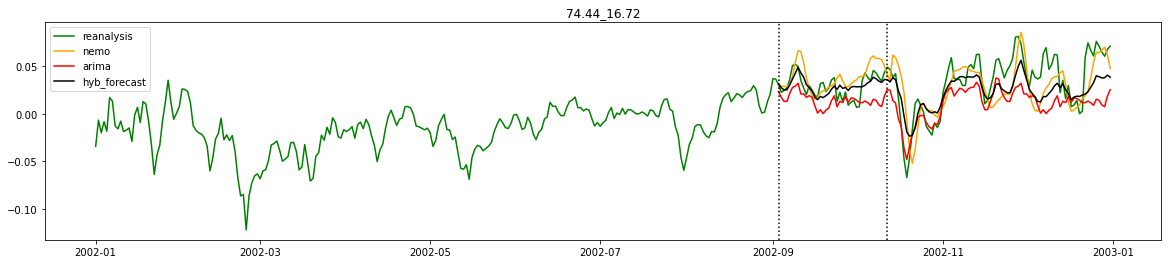

Nemo coeff: 0.37747838272688944
Arima coeff: 0.5034289477411494

Hybrid model:
MSE =  0.0005306030851278223
MAE =  0.019162628823985384
MAPE =  287.783
R^2 =  0.4606505625740889

ARIMA:
MSE =  0.0009534290451754813
MAE =  0.025106896828867308
MAPE =  253.201
R^2 =  0.03085482622657354


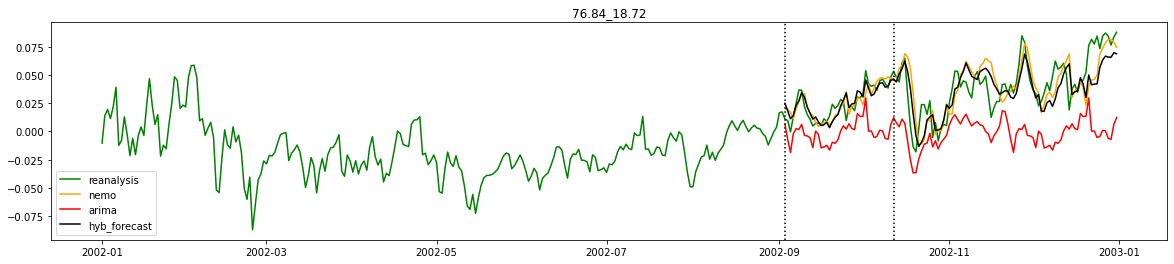

Nemo coeff: 0.7645387738836751
Arima coeff: 0.443242764663174

Hybrid model:
MSE =  0.00031420874300430474
MAE =  0.01440594953735197
MAPE =  46.0
R^2 =  0.4912541752779883

ARIMA:
MSE =  0.0023018181471606836
MAE =  0.04291710346065154
MAPE =  116.709
R^2 =  -2.726950308385631


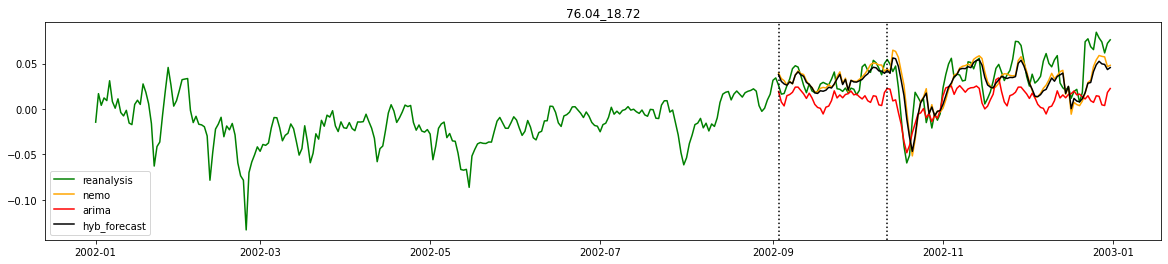

Nemo coeff: 0.8175378359002599
Arima coeff: 0.21956177320978856

Hybrid model:
MSE =  0.0005048335076396164
MAE =  0.017581360770235883
MAPE =  22.69
R^2 =  0.42712806160054184

ARIMA:
MSE =  0.0010482239754009436
MAE =  0.025907916583009827
MAPE =  53.142
R^2 =  -0.18949731263361347


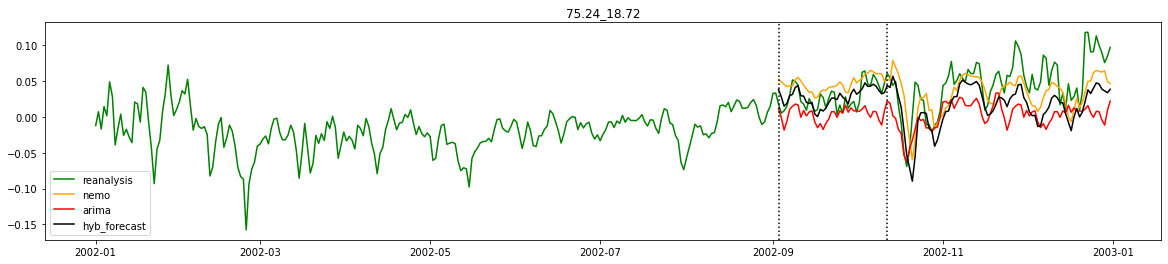

Nemo coeff: 0.9211477623595039
Arima coeff: 0.5546121322029807

Hybrid model:
MSE =  0.0017438888838655672
MAE =  0.03485786311088823
MAPE =  547.877
R^2 =  -0.25637700862639723

ARIMA:
MSE =  0.0027479970158481894
MAE =  0.04395485575154887
MAPE =  254.661
R^2 =  -0.979782257016647


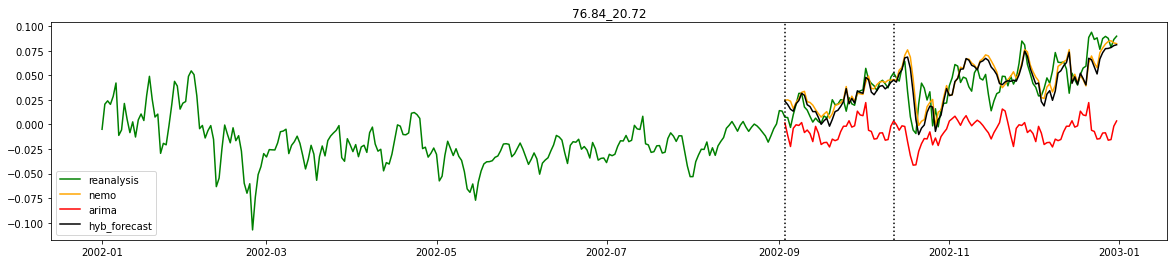

Nemo coeff: 0.9868968247302453
Arima coeff: 0.3000142572424467

Hybrid model:
MSE =  0.00038703405719139644
MAE =  0.015494055417140978
MAPE =  14.029
R^2 =  0.3038751203383916

ARIMA:
MSE =  0.0034059613281258215
MAE =  0.0542747513485781
MAPE =  76.394
R^2 =  -5.126009780325825


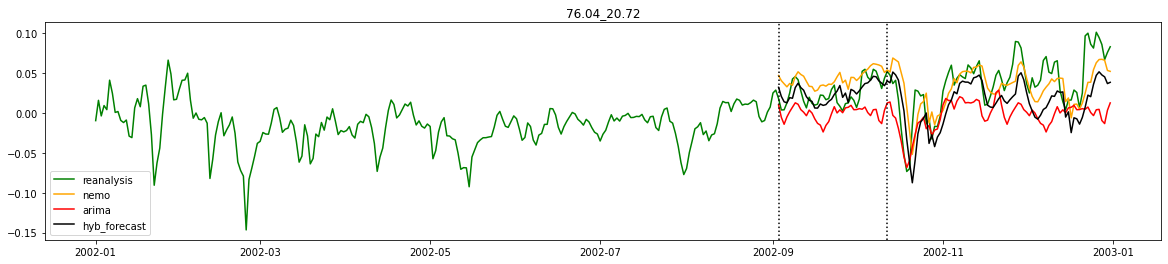

Nemo coeff: 1.0523951264076532
Arima coeff: 0.2996020138938478

Hybrid model:
MSE =  0.00135528363654292
MAE =  0.03095862782149217
MAPE =  40.568
R^2 =  -0.041419534282782555

ARIMA:
MSE =  0.002323370929025947
MAE =  0.04015557797905663
MAPE =  76.321
R^2 =  -0.7853118016272393


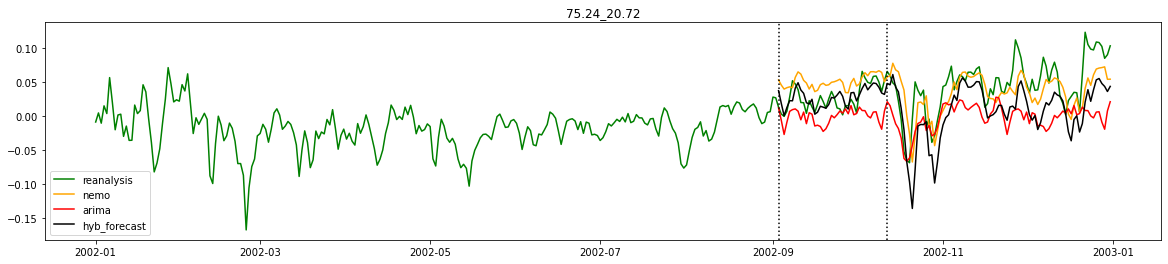

Nemo coeff: 1.191648503593399
Arima coeff: 0.535604066168552

Hybrid model:
MSE =  0.002367140765586077
MAE =  0.04038630963608804
MAPE =  4.357
R^2 =  -0.5380234277099063

ARIMA:
MSE =  0.003263032591825625
MAE =  0.04844687759001496
MAPE =  62.381
R^2 =  -1.1201191938267492


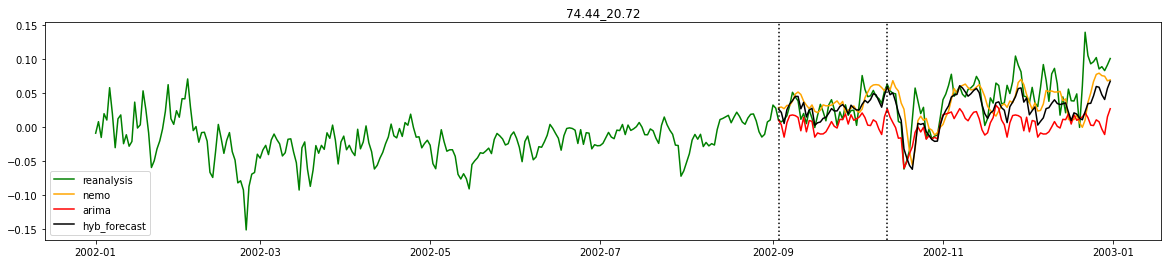

Nemo coeff: 0.6740090263852608
Arima coeff: 0.8039799448201433

Hybrid model:
MSE =  0.0011229076361862955
MAE =  0.025400948752868014
MAPE =  12.307
R^2 =  0.1490354836496337

ARIMA:
MSE =  0.002660092432913259
MAE =  0.04372870730651503
MAPE =  52.048
R^2 =  -1.0158775287246788


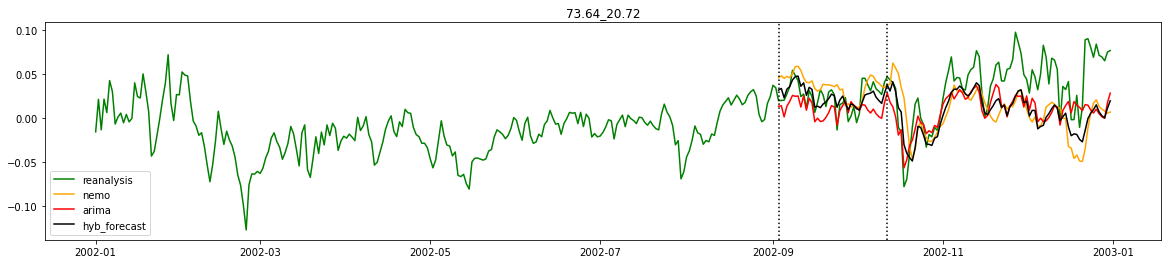

Nemo coeff: 0.5839430587097293
Arima coeff: 0.6996233890461234

Hybrid model:
MSE =  0.0017206237470785922
MAE =  0.0343668349368242
MAPE =  -317.2
R^2 =  -0.2756705155967205

ARIMA:
MSE =  0.0014286149571917147
MAE =  0.030552038795363678
MAPE =  -143.769
R^2 =  -0.05917518697752722


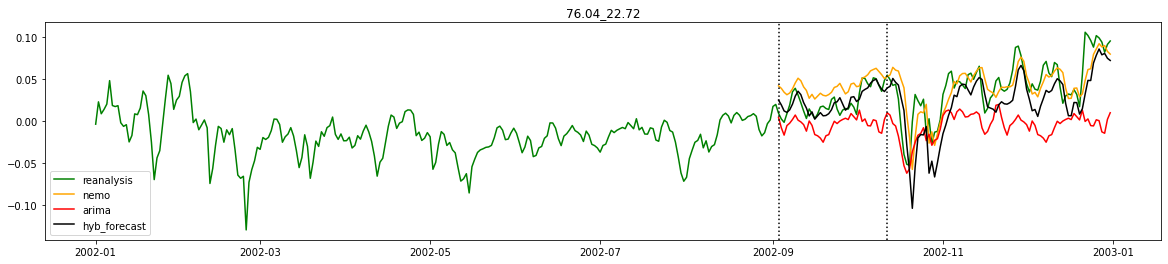

Nemo coeff: 1.2258016012946618
Arima coeff: 0.16639598474781334

Hybrid model:
MSE =  0.001030817897797399
MAE =  0.025643405262978668
MAPE =  -88.584
R^2 =  0.10160794535566309

ARIMA:
MSE =  0.0030190436674589114
MAE =  0.047879680324666676
MAPE =  43.265
R^2 =  -1.631196886729327


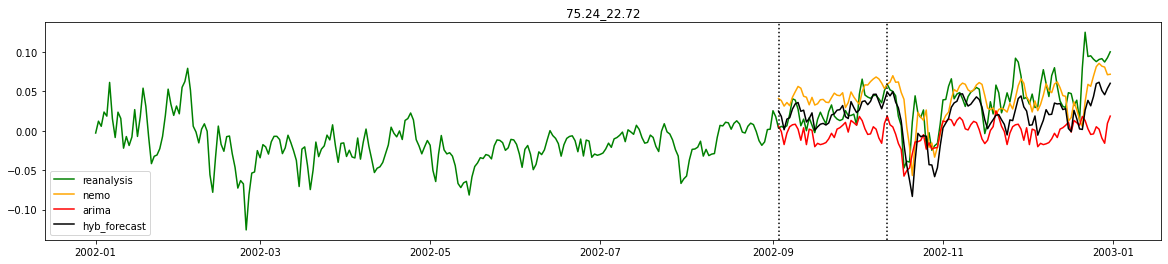

Nemo coeff: 0.8762461058626245
Arima coeff: 0.6515067447245385

Hybrid model:
MSE =  0.0012973120113656954
MAE =  0.028903874157789028
MAPE =  28.97
R^2 =  -0.12400943993061819

ARIMA:
MSE =  0.0028054527987021647
MAE =  0.0453657997929094
MAPE =  85.293
R^2 =  -1.4306839074907134


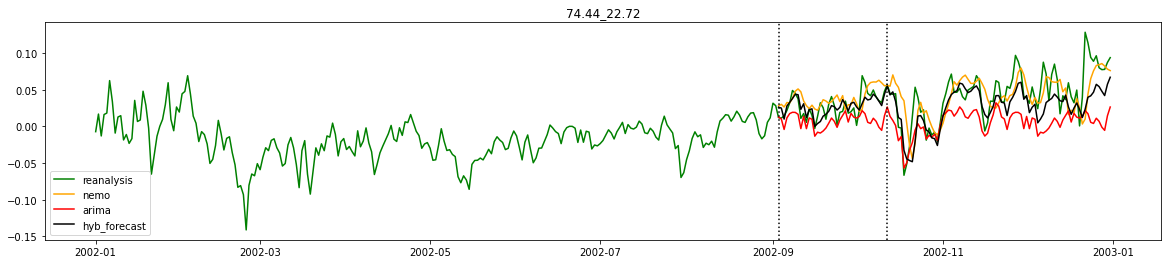

Nemo coeff: 0.5943579260139961
Arima coeff: 0.9010214805422385

Hybrid model:
MSE =  0.0008363265594214936
MAE =  0.021447555941692505
MAPE =  44.577
R^2 =  0.33939957883852157

ARIMA:
MSE =  0.002183366984979965
MAE =  0.039007202133007325
MAPE =  56.797
R^2 =  -0.724605219790613


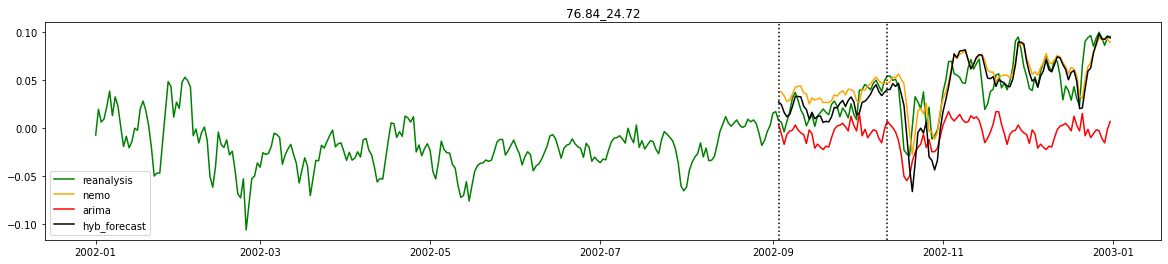

Nemo coeff: 1.2822236067983472
Arima coeff: 0.2613999374176072

Hybrid model:
MSE =  0.0005568942529389142
MAE =  0.017773346741506886
MAPE =  48.507
R^2 =  0.36727896216288347

ARIMA:
MSE =  0.0036206208928575316
MAE =  0.05500747383217615
MAPE =  119.78
R^2 =  -3.1136050459383133


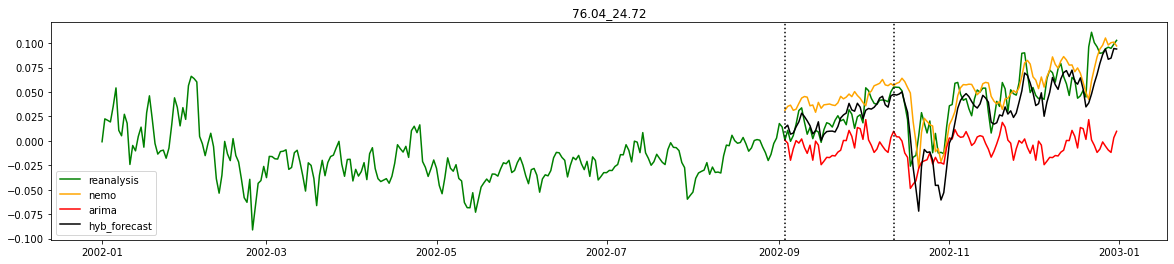

Nemo coeff: 1.141106371439698
Arima coeff: 0.6059586405303997

Hybrid model:
MSE =  0.0006137719667705282
MAE =  0.018738789230360646
MAPE =  45.686
R^2 =  0.3655805754575895

ARIMA:
MSE =  0.0036449777956919518
MAE =  0.054391804563527824
MAPE =  104.616
R^2 =  -2.7675958512411323


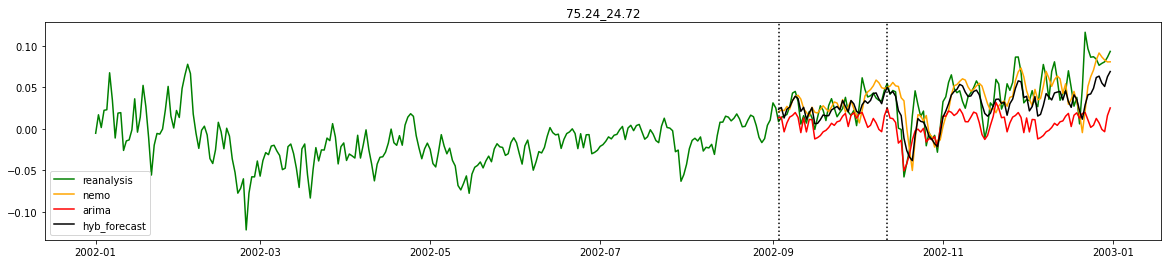

Nemo coeff: 0.6201350860388977
Arima coeff: 0.676179375630709

Hybrid model:
MSE =  0.0006126572893002446
MAE =  0.018961796335862334
MAPE =  44.677
R^2 =  0.4420647740991426

ARIMA:
MSE =  0.001913567234349725
MAE =  0.03610586577670002
MAPE =  78.588
R^2 =  -0.7426489259481768


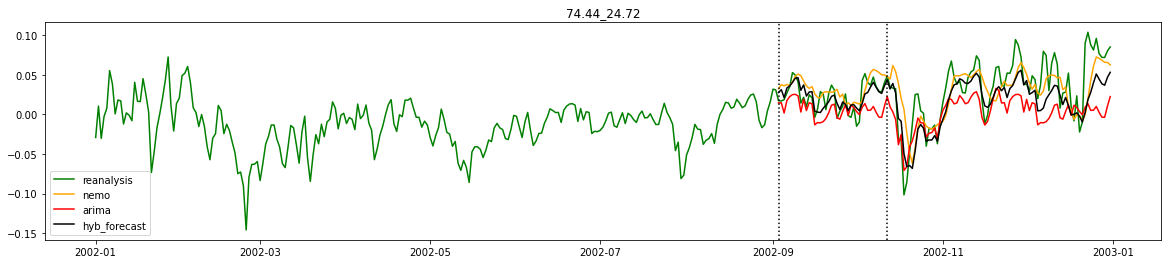

Nemo coeff: 0.6593709942285583
Arima coeff: 0.7071790482008247

Hybrid model:
MSE =  0.0009394493240524514
MAE =  0.02386682243307773
MAPE =  29.876
R^2 =  0.4488301373662845

ARIMA:
MSE =  0.001785751610608878
MAE =  0.034688553889259566
MAPE =  57.382
R^2 =  -0.04769085965330744


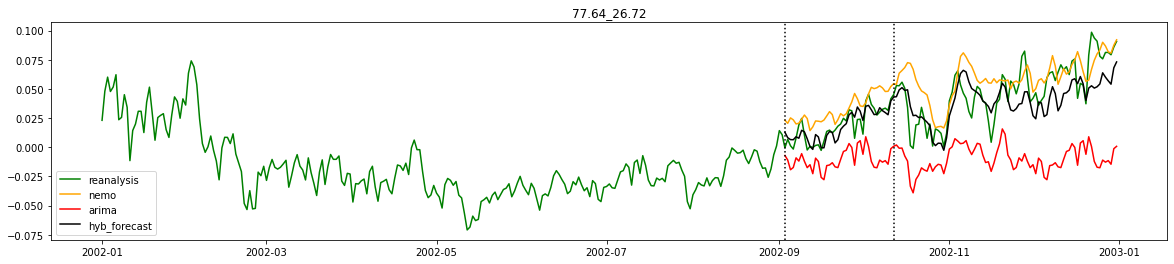

Nemo coeff: 0.8008382840124547
Arima coeff: 0.6468678881991565

Hybrid model:
MSE =  0.00035352989422196264
MAE =  0.01515169687453129
MAPE =  39.234
R^2 =  0.39718575505088727

ARIMA:
MSE =  0.0038174268933311188
MAE =  0.05783283498141302
MAPE =  175.186
R^2 =  -5.50920713626281


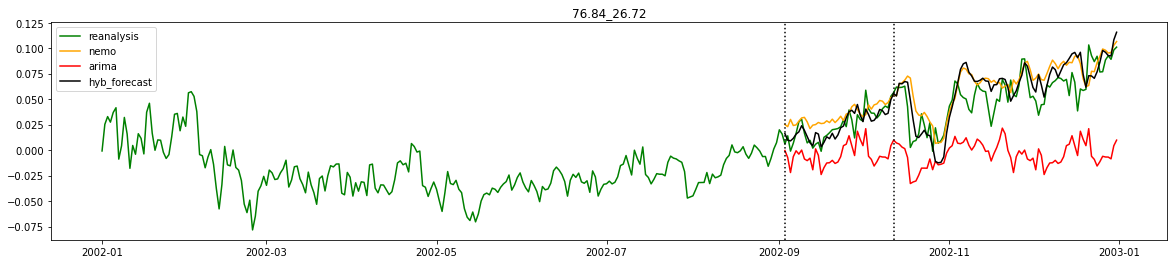

Nemo coeff: 1.1458796995066767
Arima coeff: 0.5995430976066123

Hybrid model:
MSE =  0.0003836300516700196
MAE =  0.015605403244705112
MAPE =  58.897
R^2 =  0.3522886121089156

ARIMA:
MSE =  0.00383972010643492
MAE =  0.058133395991351436
MAPE =  116.65
R^2 =  -5.482887428723884


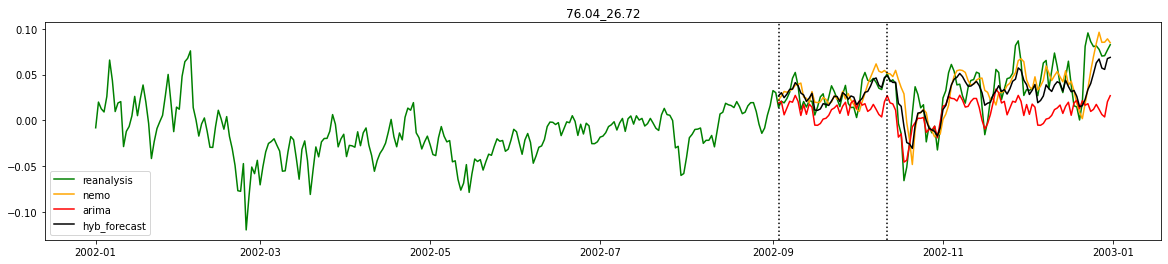

Nemo coeff: 0.5986895959556725
Arima coeff: 0.577952173280815

Hybrid model:
MSE =  0.00045494201041827183
MAE =  0.016076578304035572
MAPE =  52.56
R^2 =  0.5736208808447107

ARIMA:
MSE =  0.0012603544090216442
MAE =  0.02844062058317015
MAPE =  95.066
R^2 =  -0.18122483840975834


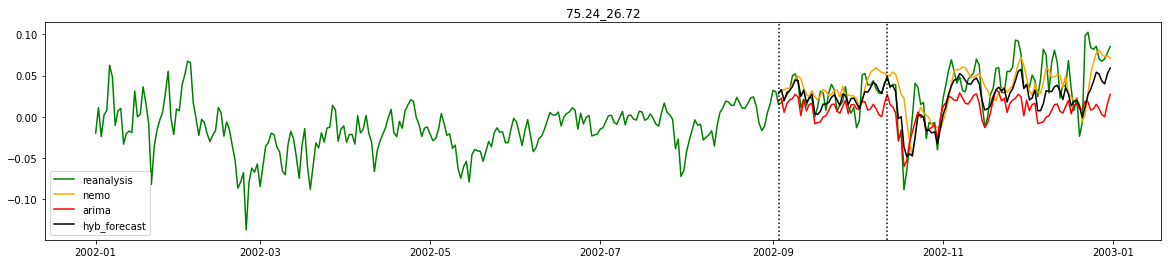

Nemo coeff: 0.6012819696931271
Arima coeff: 0.7595835773623751

Hybrid model:
MSE =  0.0008154527444492292
MAE =  0.022367260091899793
MAPE =  -55.365
R^2 =  0.43284038651348455

ARIMA:
MSE =  0.0016156083368914422
MAE =  0.033093286229133045
MAPE =  17.267
R^2 =  -0.12367982833368507


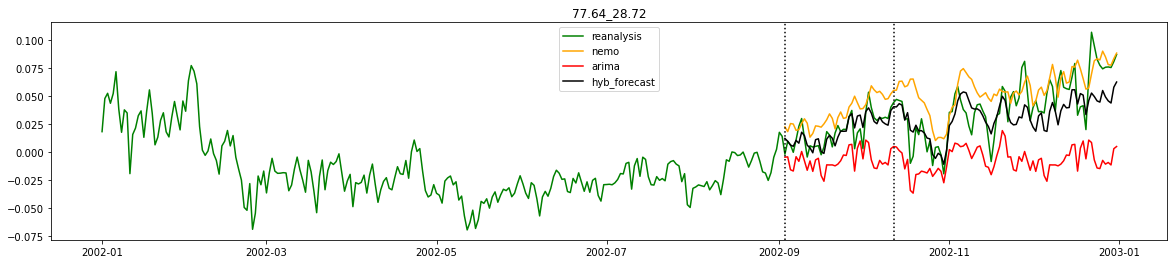

Nemo coeff: 0.6626030974455904
Arima coeff: 0.7044673743156595

Hybrid model:
MSE =  0.00039443735438717453
MAE =  0.015643104959937534
MAPE =  50.277
R^2 =  0.4508426422281975

ARIMA:
MSE =  0.0029046000101067625
MAE =  0.048636925768512584
MAPE =  159.48
R^2 =  -3.0439437319835294


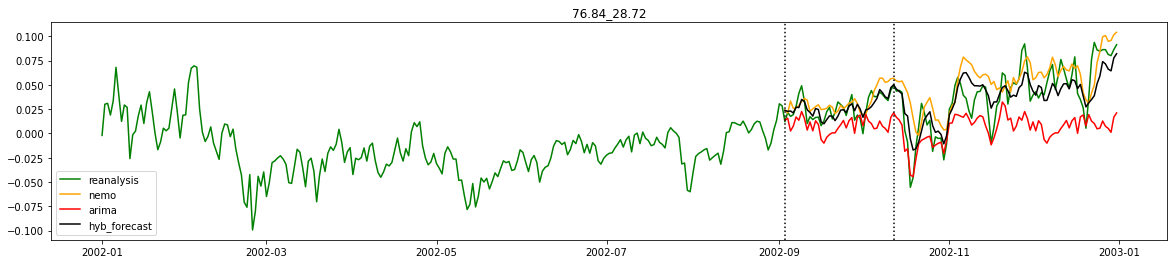

Nemo coeff: 0.674422122971846
Arima coeff: 0.6014511522928768

Hybrid model:
MSE =  0.00036543075215157516
MAE =  0.015120273192351739
MAPE =  28.721
R^2 =  0.653491588242507

ARIMA:
MSE =  0.0017863531070613239
MAE =  0.0350014129882837
MAPE =  69.773
R^2 =  -0.6938541004593286


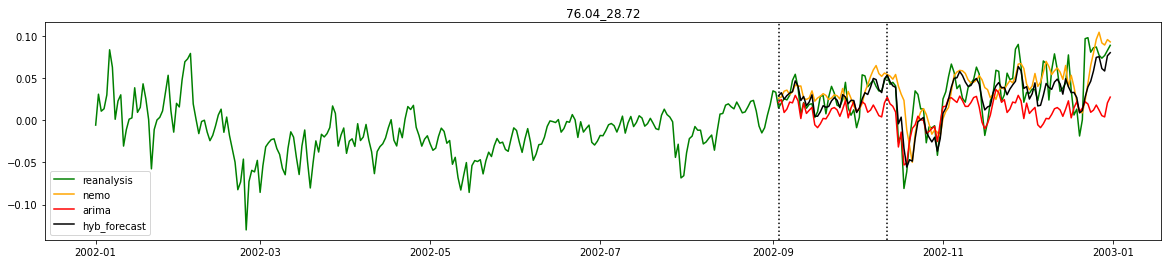

Nemo coeff: 0.6887130674503137
Arima coeff: 0.8148331614555907

Hybrid model:
MSE =  0.0005101962772143197
MAE =  0.017696870985141198
MAPE =  52.272
R^2 =  0.6194244697343505

ARIMA:
MSE =  0.0013935896096711274
MAE =  0.02996372610846365
MAPE =  88.879
R^2 =  -0.039533466549573015


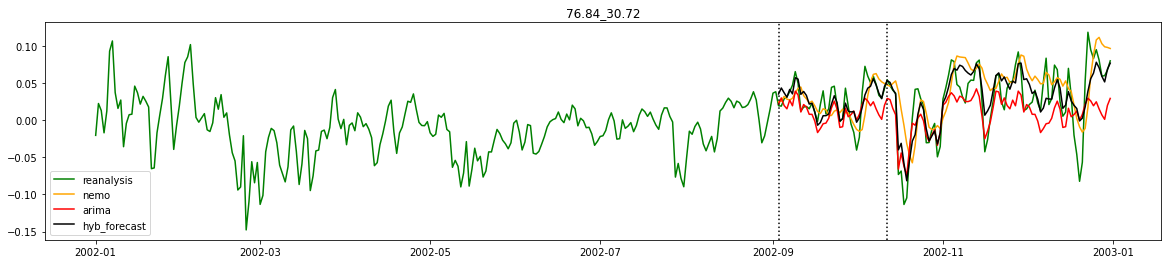

Nemo coeff: 0.478850029993725
Arima coeff: 0.9340677672555758

Hybrid model:
MSE =  0.0008080118768159282
MAE =  0.021254108786591154
MAPE =  45.78
R^2 =  0.6514541860688555

ARIMA:
MSE =  0.0014119326685203698
MAE =  0.030700511777804206
MAPE =  46.862
R^2 =  0.39094555997780855


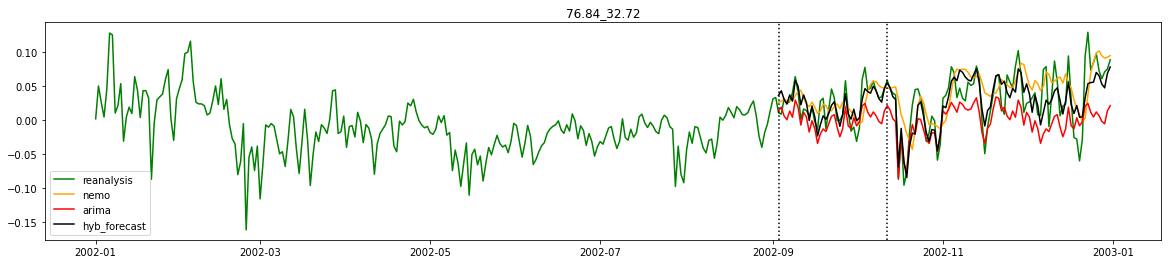

Nemo coeff: 0.4869711979555702
Arima coeff: 1.0809165120150248

Hybrid model:
MSE =  0.0007574916168432773
MAE =  0.021553064228559314
MAPE =  11.763
R^2 =  0.6390669778115877

ARIMA:
MSE =  0.0020588964776515313
MAE =  0.03798645627947528
MAPE =  51.594
R^2 =  0.018967719869045108


In [76]:
errors_df=pd.DataFrame(columns = ['POINT', 'MSE_ARIMA', 'MAE_ARIMA', 'MAPE_ARIMA', 'R^2_ARIMA',
                                  'MSE_HYB', 'MAE_HYB', 'MAPE_HYB', 'R^2_HYB'])

forcact_window=120 # величина всего прогноза (включает часть тестовых данных для поиска весов)
coeff_train_window=40 # размер окна для поиска весов
for column in list(df_rean.columns.values):
    # для каждой точки из датасета
    if column!='dates':        
        # выделяем тестовую и обучающую выборку
        test = df_rean[column][-forcact_window+coeff_train_window:]
        test.index = df_rean['dates'][-forcact_window+coeff_train_window:]
        train = df_rean[column][:-forcact_window]
        train.index = df_rean['dates'][:-forcact_window]

        # выделяем участок смоделированный NEMO 
        nemo_pr=df_nemo[column][-forcact_window:]
        nemo_pr.index = df_nemo['dates'][-forcact_window:]
        
        # выделяем обучающую выборку для поиска коэффициентов (для nemo и реальных данных, тк они уже просчитаны)
        nemo_coef_tr=df_nemo[column][-forcact_window:-forcact_window+coeff_train_window]
        nemo_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr=df_rean[column][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr.index = df_rean['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # строим модель ARIMA и делаем по ней предсказание
        stlf = STLForecast(train, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
        model_res = stlf.fit()
        forecasts = model_res.forecast(forcact_window)
        
        # выделяем обучающую выборку ARIMA для поиска коэффициентов
        arima_coef_tr=forecasts[:coeff_train_window]
        arima_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # рассчитываем коэффициенты для гибридизации
        nemo_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][0]
        arima_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][1]
        const=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[0]
                        
        # расчет гибридной модели
        hyb_forecast=nemo_coef*nemo_pr+arima_coef*forecasts+const
        hyb_forecast.index = df_nemo['dates'][-forcact_window:]
               
        
        plt.rcParams['figure.figsize'] = [20, 4]
        plt.plot(df_rean['dates'], df_rean[column], c='g', label='reanalysis')
        plt.plot(nemo_pr, c='orange', label='nemo')
        plt.plot(forecasts, c='red', label='arima')
        plt.plot(hyb_forecast, c='black', label='hyb_forecast')
        plt.axvline(x=nemo_coef_tr.index[0], c='black', linestyle=':')
        plt.axvline(x=nemo_coef_tr.index[-1], c='black', linestyle=':')
        plt.legend()
        plt.title(column)
        plt.show()
        
        print('Nemo coeff: '+str(nemo_coef))
        print('Arima coeff: '+str(arima_coef))
        
        # расчет ошибок модели
        print('\nHybrid model:')
        print("MSE = ", mean_squared_error(test, hyb_forecast[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, hyb_forecast[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, hyb_forecast[coeff_train_window:]))
        print('\nARIMA:')
        print("MSE = ", mean_squared_error(test, forecasts[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, forecasts[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, forecasts[coeff_train_window:]))
        
        # запись ошибок в датасет для каждой точки
        errors_df = errors_df.append({'POINT': column, 
                                      'MSE_ARIMA': mean_squared_error(test, forecasts[coeff_train_window:]),
                                      'MAE_ARIMA': mean_absolute_error(test, forecasts[coeff_train_window:]),
                                      'MAPE_ARIMA': round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3),
                                      'R^2_ARIMA': r2_score(test, forecasts[coeff_train_window:]),
                                      'MSE_HYB':mean_squared_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAE_HYB':mean_absolute_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAPE_HYB':round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3),
                                      'R^2_HYB':r2_score(test, hyb_forecast[coeff_train_window:]),
                                     } , ignore_index=True)
        

In [69]:
errors_df

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB
0,76.04_8.72,0.000898,0.026079,51.132,-2.377868,0.000261,0.012656,28.063,0.017952
1,76.84_10.72,0.000408,0.017232,33.206,-0.780398,0.000233,0.012546,28.092,-0.018066
2,76.04_10.72,0.001129,0.031035,46.234,-2.748760,0.000554,0.020499,29.879,-0.838245
3,75.24_10.72,0.000140,0.009324,22.691,0.342996,0.000130,0.008887,24.652,0.388335
4,76.84_12.72,0.000389,0.016450,43.900,-0.108093,0.000232,0.012738,70.047,0.339555
5,76.04_12.72,0.000531,0.020157,39.932,-1.099442,0.000255,0.013036,31.560,-0.008776
6,75.24_12.72,0.000169,0.010375,29.298,0.169875,0.000190,0.010892,43.925,0.063932
7,76.04_14.72,0.000523,0.018871,47.211,0.022249,0.000384,0.017178,79.277,0.282707
8,75.24_14.72,0.000250,0.013605,5.853,0.112713,0.000187,0.011388,-54.175,0.335606
9,76.04_16.72,0.000724,0.021343,31.235,-0.187508,0.000280,0.012970,1.437,0.540575


In [70]:
errors_df['MSE_DIF']=abs(errors_df['MSE_HYB'])-abs(errors_df['MSE_ARIMA'])
errors_df['MAE_DIF']=abs(errors_df['MAE_HYB'])-abs(errors_df['MAE_ARIMA'])
errors_df['MAPE_DIF']=abs(errors_df['MAPE_HYB'])-abs(errors_df['MAPE_ARIMA'])
errors_df['R^2_DIF']=abs(errors_df['R^2_HYB'])-abs(errors_df['R^2_ARIMA'])
errors_df

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB,MSE_DIF,MAE_DIF,MAPE_DIF,R^2_DIF
0,76.04_8.72,0.000898,0.026079,51.132,-2.377868,0.000261,0.012656,28.063,0.017952,-0.000637,-0.013424,-23.069,-2.359915
1,76.84_10.72,0.000408,0.017232,33.206,-0.780398,0.000233,0.012546,28.092,-0.018066,-0.000175,-0.004686,-5.114,-0.762332
2,76.04_10.72,0.001129,0.031035,46.234,-2.748760,0.000554,0.020499,29.879,-0.838245,-0.000576,-0.010536,-16.355,-1.910515
3,75.24_10.72,0.000140,0.009324,22.691,0.342996,0.000130,0.008887,24.652,0.388335,-0.000010,-0.000437,1.961,0.045339
4,76.84_12.72,0.000389,0.016450,43.900,-0.108093,0.000232,0.012738,70.047,0.339555,-0.000157,-0.003712,26.147,0.231462
5,76.04_12.72,0.000531,0.020157,39.932,-1.099442,0.000255,0.013036,31.560,-0.008776,-0.000276,-0.007122,-8.372,-1.090665
6,75.24_12.72,0.000169,0.010375,29.298,0.169875,0.000190,0.010892,43.925,0.063932,0.000022,0.000517,14.627,-0.105943
7,76.04_14.72,0.000523,0.018871,47.211,0.022249,0.000384,0.017178,79.277,0.282707,-0.000139,-0.001693,32.066,0.260459
8,75.24_14.72,0.000250,0.013605,5.853,0.112713,0.000187,0.011388,-54.175,0.335606,-0.000063,-0.002216,48.322,0.222893
9,76.04_16.72,0.000724,0.021343,31.235,-0.187508,0.000280,0.012970,1.437,0.540575,-0.000444,-0.008374,-29.798,0.353066


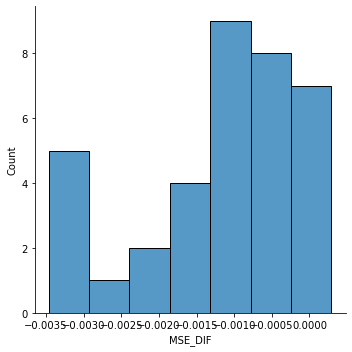

In [71]:
sns.displot(errors_df, x="MSE_DIF")

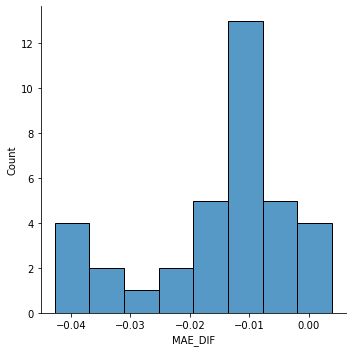

In [72]:
sns.displot(errors_df, x="MAE_DIF")

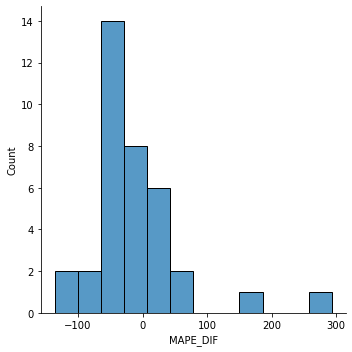

In [73]:
sns.displot(errors_df, x="MAPE_DIF")

## Пробуем без константы

In [77]:
errors_df=pd.DataFrame(columns = ['POINT', 'MSE_ARIMA', 'MAE_ARIMA', 'MAPE_ARIMA', 'R^2_ARIMA',
                                  'MSE_HYB', 'MAE_HYB', 'MAPE_HYB', 'R^2_HYB'])

forcact_window=120 # величина всего прогноза (включает часть тестовых данных для поиска весов)
coeff_train_window=40 # размер окна для поиска весов
for column in list(df_rean.columns.values):
    # для каждой точки из датасета
    if column!='dates':        
        # выделяем тестовую и обучающую выборку
        test = df_rean[column][-forcact_window+coeff_train_window:]
        test.index = df_rean['dates'][-forcact_window+coeff_train_window:]
        train = df_rean[column][:-forcact_window]
        train.index = df_rean['dates'][:-forcact_window]

        # выделяем участок смоделированный NEMO 
        nemo_pr=df_nemo[column][-forcact_window:]
        nemo_pr.index = df_nemo['dates'][-forcact_window:]
        
        # выделяем обучающую выборку для поиска коэффициентов (для nemo и реальных данных, тк они уже просчитаны)
        nemo_coef_tr=df_nemo[column][-forcact_window:-forcact_window+coeff_train_window]
        nemo_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr=df_rean[column][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr.index = df_rean['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # строим модель ARIMA и делаем по ней предсказание
        stlf = STLForecast(train, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
        model_res = stlf.fit()
        forecasts = model_res.forecast(forcact_window)
        
        # выделяем обучающую выборку ARIMA для поиска коэффициентов
        arima_coef_tr=forecasts[:coeff_train_window]
        arima_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # рассчитываем коэффициенты для гибридизации
        nemo_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][0]
        arima_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][1]
        const=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[0]
                        
        # расчет гибридной модели
        hyb_forecast=nemo_coef*nemo_pr+arima_coef*forecasts
        hyb_forecast.index = df_nemo['dates'][-forcact_window:]
               
        '''
        plt.rcParams['figure.figsize'] = [20, 4]
        plt.plot(df_rean['dates'], df_rean[column], c='g', label='reanalysis')
        plt.plot(nemo_pr, c='orange', label='nemo')
        plt.plot(forecasts, c='red', label='arima')
        plt.plot(hyb_forecast, c='black', label='hyb_forecast')
        plt.axvline(x=nemo_coef_tr.index[0], c='black', linestyle=':')
        plt.axvline(x=nemo_coef_tr.index[-1], c='black', linestyle=':')
        plt.legend()
        plt.title(column)
        plt.show()
        
        print('Nemo coeff: '+str(nemo_coef))
        print('Arima coeff: '+str(arima_coef))
        
        # расчет ошибок модели
        print('\nHybrid model:')
        print("MSE = ", mean_squared_error(test, hyb_forecast[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, hyb_forecast[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, hyb_forecast[coeff_train_window:]))
        print('\nARIMA:')
        print("MSE = ", mean_squared_error(test, forecasts[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, forecasts[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, forecasts[coeff_train_window:]))
        '''
        # запись ошибок в датасет для каждой точки
        errors_df = errors_df.append({'POINT': column, 
                                      'MSE_ARIMA': mean_squared_error(test, forecasts[coeff_train_window:]),
                                      'MAE_ARIMA': mean_absolute_error(test, forecasts[coeff_train_window:]),
                                      'MAPE_ARIMA': round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3),
                                      'R^2_ARIMA': r2_score(test, forecasts[coeff_train_window:]),
                                      'MSE_HYB':mean_squared_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAE_HYB':mean_absolute_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAPE_HYB':round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3),
                                      'R^2_HYB':r2_score(test, hyb_forecast[coeff_train_window:]),
                                     } , ignore_index=True)
        

In [78]:
errors_df['MSE_DIF']=abs(errors_df['MSE_HYB'])-abs(errors_df['MSE_ARIMA'])
errors_df['MAE_DIF']=abs(errors_df['MAE_HYB'])-abs(errors_df['MAE_ARIMA'])
errors_df['MAPE_DIF']=abs(errors_df['MAPE_HYB'])-abs(errors_df['MAPE_ARIMA'])
errors_df['R^2_DIF']=abs(errors_df['R^2_HYB'])-abs(errors_df['R^2_ARIMA'])
errors_df

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB,MSE_DIF,MAE_DIF,MAPE_DIF,R^2_DIF
0,76.04_8.72,0.000898,0.026079,51.132,-2.377868,0.000788,0.024322,46.502,-1.961911,-0.000111,-0.001758,-4.630,-0.415957
1,76.84_10.72,0.000408,0.017232,33.206,-0.780398,0.000971,0.028322,53.979,-3.241047,0.000564,0.011091,20.773,2.460649
2,76.04_10.72,0.001129,0.031035,46.234,-2.748760,0.001790,0.040104,60.970,-4.943394,0.000661,0.009069,14.736,2.194633
3,75.24_10.72,0.000140,0.009324,22.691,0.342996,0.000361,0.016485,31.919,-0.696076,0.000221,0.007162,9.228,0.353081
4,76.84_12.72,0.000389,0.016450,43.900,-0.108093,0.001131,0.030180,65.847,-2.224106,0.000742,0.013731,21.947,2.116013
5,76.04_12.72,0.000531,0.020157,39.932,-1.099442,0.000961,0.028256,56.358,-2.798944,0.000430,0.008098,16.426,1.699502
6,75.24_12.72,0.000169,0.010375,29.298,0.169875,0.000402,0.016926,40.795,-0.979850,0.000234,0.006551,11.497,0.809974
7,76.04_14.72,0.000523,0.018871,47.211,0.022249,0.001365,0.032453,62.199,-1.553176,0.000842,0.013582,14.988,1.530927
8,75.24_14.72,0.000250,0.013605,5.853,0.112713,0.000761,0.024444,44.849,-1.705510,0.000511,0.010839,38.996,1.592797
9,76.04_16.72,0.000724,0.021343,31.235,-0.187508,0.000659,0.022455,22.274,-0.080107,-0.000065,0.001111,-8.961,-0.107402


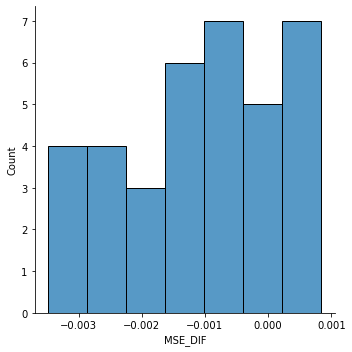

In [79]:
sns.displot(errors_df, x="MSE_DIF")

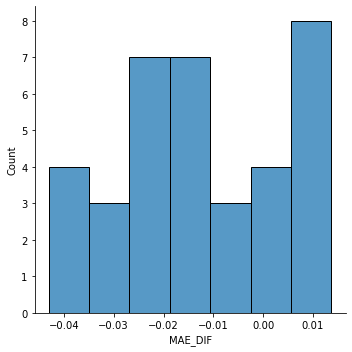

In [80]:
sns.displot(errors_df, x="MAE_DIF")

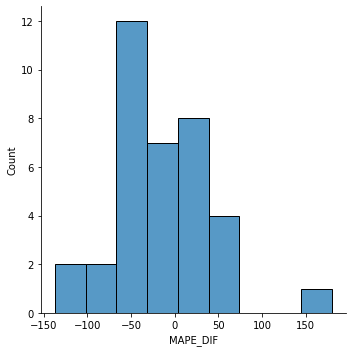

In [81]:
sns.displot(errors_df, x="MAPE_DIF")

***без константы вроде немножко хуже***

## Теперь увеличим выборку

In [88]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_NEMO_SPITZ_GRID.csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%d.%m.%Y')

for column in list(df_nemo.columns.values):
    if column!='dates':
        df_nemo[column]=df_nemo[column]-np.mean(df_nemo[column])
        stl = STL(df_nemo[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            #print(ks)
            df_nemo[column]=df_nemo[column]-res.resid
        else:
            print(column)
            

df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis_GRID.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')

for column in list(df_rean.columns.values):
    if column!='dates':
        df_rean[column]=df_rean[column]-np.mean(df_rean[column])
        stl = STL(df_rean[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)        
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            df_rean[column]=df_rean[column]-res.resid
        else:
            print(column)
            
df_rean

,76.04_8.72,75.84_8.72,75.64_8.72,75.44_8.72,76.44_9.72,76.24_9.72,76.04_9.72,75.84_9.72,75.64_9.72,75.44_9.72,...,76.84_30.72,76.64_30.72,76.44_30.72,76.24_30.72,77.04_31.72,76.84_31.72,76.64_31.72,76.44_31.72,76.84_32.72,dates
0,0.034992,0.034718,0.032032,0.027844,0.026310,0.028339,0.027947,0.027634,0.026690,0.016180,...,-0.020535,-0.027864,-0.034043,-0.034043,0.008050,0.000913,-0.021561,-0.030222,0.001356,2002-01-01
1,0.058270,0.058306,0.055602,0.050686,0.049921,0.051845,0.052467,0.052148,0.051075,0.040347,...,0.022316,0.014934,0.009822,0.009822,0.050113,0.046925,0.027756,0.020172,0.049706,2002-01-02
2,0.062436,0.062537,0.059925,0.055279,0.054040,0.055957,0.057700,0.057536,0.056527,0.046154,...,0.012881,0.001712,-0.008514,-0.008514,0.039593,0.032066,0.008459,-0.002192,0.025435,2002-01-03
3,0.063424,0.063512,0.061063,0.056140,0.054533,0.056757,0.059166,0.058829,0.057676,0.046912,...,-0.017130,-0.022521,-0.022301,-0.022301,0.002329,-0.001674,-0.016318,-0.021154,0.004181,2002-01-04
4,0.056305,0.056191,0.053409,0.047372,0.047233,0.049387,0.050545,0.049952,0.048565,0.036534,...,0.012275,0.009005,0.006407,0.006407,0.034164,0.037784,0.022573,0.016598,0.045194,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.053847,0.047681,0.039707,0.041549,0.063631,0.066376,0.062971,0.055390,0.049154,0.048711,...,0.080870,0.076975,0.081327,0.081327,0.091999,0.084992,0.073588,0.072650,0.071904,2002-12-27
361,0.056429,0.049822,0.040671,0.040778,0.063836,0.067421,0.064336,0.056341,0.049220,0.048054,...,0.059155,0.056916,0.064658,0.064658,0.071171,0.066003,0.055439,0.054380,0.060337,2002-12-28
362,0.059627,0.053090,0.045162,0.045927,0.066616,0.070397,0.067439,0.059568,0.052695,0.052243,...,0.059734,0.057916,0.064062,0.064062,0.076493,0.074301,0.060417,0.056684,0.070495,2002-12-29
363,0.066121,0.059172,0.051419,0.052143,0.075578,0.078953,0.074769,0.066495,0.059423,0.059202,...,0.067323,0.065050,0.070196,0.070196,0.084828,0.082266,0.066639,0.062536,0.074877,2002-12-30


In [89]:
errors_df=pd.DataFrame(columns = ['POINT', 'MSE_ARIMA', 'MAE_ARIMA', 'MAPE_ARIMA', 'R^2_ARIMA',
                                  'MSE_HYB', 'MAE_HYB', 'MAPE_HYB', 'R^2_HYB'])

forcact_window=120 # величина всего прогноза (включает часть тестовых данных для поиска весов)
coeff_train_window=40 # размер окна для поиска весов
for column in list(df_rean.columns.values):
    # для каждой точки из датасета
    if column!='dates':        
        # выделяем тестовую и обучающую выборку
        test = df_rean[column][-forcact_window+coeff_train_window:]
        test.index = df_rean['dates'][-forcact_window+coeff_train_window:]
        train = df_rean[column][:-forcact_window]
        train.index = df_rean['dates'][:-forcact_window]

        # выделяем участок смоделированный NEMO 
        nemo_pr=df_nemo[column][-forcact_window:]
        nemo_pr.index = df_nemo['dates'][-forcact_window:]
        
        # выделяем обучающую выборку для поиска коэффициентов (для nemo и реальных данных, тк они уже просчитаны)
        nemo_coef_tr=df_nemo[column][-forcact_window:-forcact_window+coeff_train_window]
        nemo_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr=df_rean[column][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr.index = df_rean['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # строим модель ARIMA и делаем по ней предсказание
        stlf = STLForecast(train, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
        model_res = stlf.fit()
        forecasts = model_res.forecast(forcact_window)
        
        # выделяем обучающую выборку ARIMA для поиска коэффициентов
        arima_coef_tr=forecasts[:coeff_train_window]
        arima_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # рассчитываем коэффициенты для гибридизации
        nemo_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][0]
        arima_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][1]
        const=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[0]
                        
        # расчет гибридной модели
        hyb_forecast=nemo_coef*nemo_pr+arima_coef*forecasts+const
        hyb_forecast.index = df_nemo['dates'][-forcact_window:]
               
        '''
        plt.rcParams['figure.figsize'] = [20, 4]
        plt.plot(df_rean['dates'], df_rean[column], c='g', label='reanalysis')
        plt.plot(nemo_pr, c='orange', label='nemo')
        plt.plot(forecasts, c='red', label='arima')
        plt.plot(hyb_forecast, c='black', label='hyb_forecast')
        plt.axvline(x=nemo_coef_tr.index[0], c='black', linestyle=':')
        plt.axvline(x=nemo_coef_tr.index[-1], c='black', linestyle=':')
        plt.legend()
        plt.title(column)
        plt.show()
        
        print('Nemo coeff: '+str(nemo_coef))
        print('Arima coeff: '+str(arima_coef))
        
        # расчет ошибок модели
        print('\nHybrid model:')
        print("MSE = ", mean_squared_error(test, hyb_forecast[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, hyb_forecast[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, hyb_forecast[coeff_train_window:]))
        print('\nARIMA:')
        print("MSE = ", mean_squared_error(test, forecasts[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, forecasts[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, forecasts[coeff_train_window:]))
        '''
        # запись ошибок в датасет для каждой точки
        errors_df = errors_df.append({'POINT': column, 
                                      'MSE_ARIMA': mean_squared_error(test, forecasts[coeff_train_window:]),
                                      'MAE_ARIMA': mean_absolute_error(test, forecasts[coeff_train_window:]),
                                      'MAPE_ARIMA': round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3),
                                      'R^2_ARIMA': r2_score(test, forecasts[coeff_train_window:]),
                                      'MSE_HYB':mean_squared_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAE_HYB':mean_absolute_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAPE_HYB':round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3),
                                      'R^2_HYB':r2_score(test, hyb_forecast[coeff_train_window:]),
                                     } , ignore_index=True)

In [90]:
errors_df['MSE_DIF']=abs(errors_df['MSE_HYB'])-abs(errors_df['MSE_ARIMA'])
errors_df['MAE_DIF']=abs(errors_df['MAE_HYB'])-abs(errors_df['MAE_ARIMA'])
errors_df['MAPE_DIF']=abs(errors_df['MAPE_HYB'])-abs(errors_df['MAPE_ARIMA'])
errors_df['R^2_DIF']=abs(errors_df['R^2_HYB'])-abs(errors_df['R^2_ARIMA'])

In [91]:
errors_df

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB,MSE_DIF,MAE_DIF,MAPE_DIF,R^2_DIF
0,76.04_8.72,0.000898,0.026079,51.132,-2.377868,0.000246,0.012189,27.461,0.073323,-0.000652,-0.013891,-23.671,-2.304545
1,75.84_8.72,0.000614,0.020515,45.322,-1.572977,0.000149,0.009442,31.287,0.377780,-0.000466,-0.011072,-14.035,-1.195197
2,75.64_8.72,0.000359,0.015332,37.656,-0.641434,0.000140,0.009052,28.004,0.359996,-0.000219,-0.006281,-9.652,-0.281437
3,75.44_8.72,0.000222,0.012016,32.666,0.067874,0.000186,0.010628,37.349,0.216616,-0.000035,-0.001388,4.683,0.148742
4,76.44_9.72,0.001116,0.029940,44.233,-2.291690,0.000503,0.019219,30.778,-0.483364,-0.000613,-0.010721,-13.455,-1.808327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,77.04_31.72,0.002006,0.037171,83.244,0.056572,0.000764,0.021175,48.662,0.640902,-0.001243,-0.015996,-34.582,0.584329
273,76.84_31.72,0.001887,0.036070,89.839,0.153044,0.000816,0.022222,55.840,0.633834,-0.001071,-0.013848,-33.999,0.480790
274,76.64_31.72,0.001399,0.030386,51.047,0.408133,0.000817,0.021562,65.690,0.654613,-0.000583,-0.008824,14.643,0.246480
275,76.44_31.72,0.001411,0.030298,48.518,0.445341,0.000847,0.022008,34.375,0.666886,-0.000564,-0.008290,-14.143,0.221544


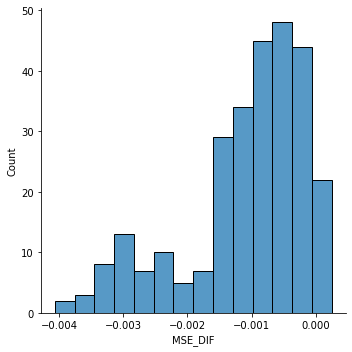

In [92]:
sns.displot(errors_df, x="MSE_DIF")

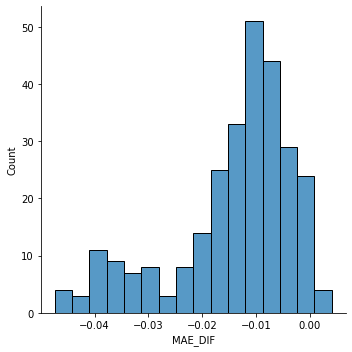

In [93]:
sns.displot(errors_df, x="MAE_DIF")

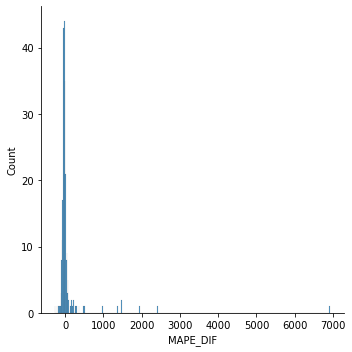

In [94]:
sns.displot(errors_df, x="MAPE_DIF")